In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import time
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth',800)

plt.figure(figsize=(20,10))
# plt.subplots(figsize=(20,20))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [3]:
android_dev = pd.read_csv('datasets/Android_Developer.csv')
ai = pd.read_csv('datasets/Artificial_Intilligence.csv')
backend_dev = pd.read_csv('datasets/Backend_Developer.csv')
business_analyst = pd.read_csv('datasets/Business_Analyst.csv')
cloud_computing = pd.read_csv('datasets/Cloud_Computing.csv')
data_analyst = pd.read_csv('datasets/Data_Analyst.csv')
data_scientist = pd.read_csv('datasets/Data_Scientist.csv')
deep_learning = pd.read_csv('datasets/Deep_Learning.csv')
devops = pd.read_csv('datasets/Devops_Engineer.csv')
flutter_dev = pd.read_csv('datasets/Flutter_Developer.csv')
full_stack_dev = pd.read_csv('datasets/Full_Stack_Developer.csv')
game_artist = pd.read_csv('datasets/Game_Artist.csv')
game_designer = pd.read_csv('datasets/Game_Designer.csv')
iOS_dev = pd.read_csv('datasets/iOS_Developer.csv')
java_dev = pd.read_csv('datasets/Java_Developer.csv')
ml = pd.read_csv('datasets/Machine_Learning.csv')
mean = pd.read_csv('datasets/MEAN_Stack_Developer.csv')
mern = pd.read_csv('datasets/MERN_Stack_Developer.csv')
net_security_engg = pd.read_csv('datasets/Network_Security_Engineer.csv')
node_js = pd.read_csv('datasets/Node_Js_Developer.csv')
php_dev = pd.read_csv('datasets/PHP_Developer.csv')
py_dev = pd.read_csv('datasets/Python_Developer.csv')
react_js= pd.read_csv('datasets/React_Js_Developer.csv')
react_native_dev = pd.read_csv('datasets/React_Native_Developer.csv')
sys_admin = pd.read_csv('datasets/System_Administrator.csv')
ui_ux = pd.read_csv('datasets/UI_UX_Developer.csv')
web_dev = pd.read_csv('datasets/Web_Developer.csv')

In [4]:
filename = [ android_dev, ai, backend_dev, business_analyst, cloud_computing, data_analyst, data_scientist, 
            deep_learning, devops,  full_stack_dev, game_artist, game_designer, iOS_dev, java_dev, ml, mean, mern, 
            net_security_engg, node_js, php_dev, py_dev, react_js, react_native_dev, sys_admin, ui_ux, web_dev]

In [5]:
android_dev

,Job Name,Company Name,Location,Salary,Description
0,Android Developer,Arham Labs,"Mumbai, Maharashtra",NaN,You will be working alongside designers and other engineers and developers working on different layers of the infrastructure.
1,Urgent Opening For Android Developer (Immediate Joining),Prolifiquetech,"Vashi, Navi Mumbai, Maharashtra",300000 - 400000,"Design and build advanced applications for the Android platform.Collaborate with cross-functional teams to define, design, and ship new features."
2,Android Developer,City Dreams Enterprises,NaN,25000 - 35000,"Proficient with problem solving, Data Structure, Algorithms, and ObjectOriented Design.Clear understanding of the Android platform and Android SDK, different…"
3,Sr. Android Developer,CREATIVE INFOWAY,Gujarat,NaN,"Knowledge of Android UI frameworks.Strong knowledge of Android SDK, different versions of Android, and how to deal with different screen-sizes...."
4,Remote Android Developer,Rishabh Group India,"Ujjain, Madhya Pradesh",20000 - 30000,Conceptualizing and formulating apps that are suitable for use on all types of Android devices.Implementing measures to safeguard users’ data.
5,iOS & Android Application Developer,Innovative Concepts,"Mumbai, Maharashtra",NaN,The candidate should have experience to do modifications or changes in the existing App.Should have thorough knowledge of Android & iOS.
6,Android Developer,MegThink Solutions,"Gurgaon, Haryana",238115 - 600000,"Should be good at Android UI design principles and design patterns.Hands-on experience in Restful, JSON, location based services.Temporarily due to COVID-19."
7,Android Developer,SMR IT Solutions,"Jogeshwari, Mumbai, Maharashtra",15000 - 20000,"We had Started New Company.We need Back-end and Front-end Developer.Salary: ₹15,000.00 - ₹20,000.00 per month.Android Studio: 1 year (Required)."
8,Android Developer,Sigmato Solutions,"Jayanagar, Bengaluru, Karnataka",NaN,"We are searching for a brilliant, flexible Android Developer to create apps that meet the needs of our target audience."
9,Android Developer,NunCeyali Private Limited,"Chennai, Tamil Nadu",NaN,"Translate designs and wireframes into high quality code.Design, build, and maintain high performance, reusable, and reliable Java code."


In [6]:
android_dev.shape

(80, 5)

# Droping Duplicate Values from each DataFrame

In [7]:
def Duplicate_Dropper(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i].drop_duplicates(subset="Description", keep= 'first', inplace=True)
    
Duplicate_Dropper(filename)

In [8]:
react_native_dev.drop(10,inplace=True)

# Replacing NAN Values

In [9]:
def NA_filler(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Salary'].fillna('',inplace=True)

NA_filler(filename)

# Salary Cleaning

In [10]:

def Salary_Cleaning(salary):
    
    sal = salary.split('-')
    if len(sal)==2:
        added_sal = (float(sal[0]) + float(sal[1]))//2
        if added_sal <100000:
            converted_sal = added_sal*12
            return converted_sal
        else:
            return added_sal
    try:
        return float(sal[0])
    except Exception as e:
 
        return None

# Calling Salary Cleaner

In [11]:
def calling_salary_cleaning(dataframe_name):
    for i in range(0,len(dataframe_name)):
            dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Salary'].apply(Salary_Cleaning)
            
calling_salary_cleaning(filename)

# Converting outlier salary

In [12]:
def Lower_Salary(salary):
    if salary <=99999:
        sal = salary*12
        return sal
    else:
        return salary


# Calling Lower Salary

In [13]:
def calling_lower_salary(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Yearly Salary'].apply(Lower_Salary)

calling_lower_salary(filename)

# Predicting NaN values

In [14]:
def predicting_nan_values(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Yearly Salary'] = round(dataframe_name[i]['Yearly Salary'].interpolate())
        dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Yearly Salary'].fillna(method='bfill')
        dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Yearly Salary'].fillna(method='ffill')
        

predicting_nan_values(filename)

# Check for nan value

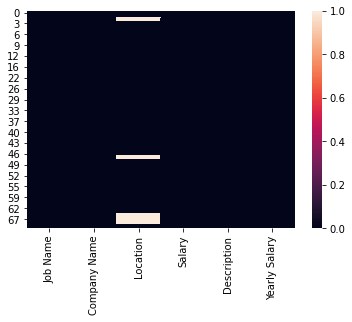

In [15]:
sns.heatmap(android_dev.isnull())

# Checking for Skills

In [16]:
skills_list= ['Data Structure','ObjectOriented', 'Algorithms','Android platform','Android', 'Android Studio' ]

In [1]:
# def skills_appender(android_dev):
#     for i in range(0,len(android_dev)):
#         des_list = android_dev['Description'].tolist()
#         return des_list[i]
#     for j in range(0,len(skills_list)):
#         if skills_list[j] in des_list[j]: 
#             android_dev['Skills'] = skills_list[j]
#         return android_dev['Skills'] 
        
# skills_appender(android_dev)


def skills_appender(android_dev):
        lst= []
        for i in range (0,len(android_dev)):
            des_list=android_dev['Description'].tolist()
            for j in range(0,len(skills_list)):
                if(skills_list[j] in des_list[i]):
                    print(des_list[i],'---------------',skills_list[j])
                    lst.append(skills_list[j])
            print(lst)

                 
skills_appender(android_dev)




NameError: name 'android_dev' is not defined

# Use the Below code to call each file 

In [18]:
def calling_skills_appender(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Skills'] = dataframe_name[i]['Skills'].apply(skills_appender)

calling_lower_salary(filename)

In [19]:
demo = "Proficient with problem solving, Data Structure, and ObjectOriented Design.Clear understanding of the Android platform and Android SDK, different"
print(len(demo))

demo_list= ['Data Structure','ObjectOriented', 'Algorithms','Android platform','Anuj' ]

145


In [20]:
# for i in range(0,len(demo_list)):
#     if demo_list[i] in demo:
#         print(demo_list[i])
        
        
    

# def skill_checker(android_dev):
#     for i in range(0, len(android_dev)):
        
#         for j in range(0,len(demo_list)):
#             if demo_list[j] in android_dev['Description'].tolist():
#                 android_dev['Skills'] = demo_list[i]
            
# skill_checker(android_dev)
# print(len(android_dev['Description']))



# # def skill_checker(dataframe_name):
# #     for i in range(0, len(dataframe_name)):
        
# #         for i in range(0,len(demo_list)):
# #         if demo_list[i] in android_dev['Description']:
# #             print(demo_list[i])
            
# # skill_checker(filename)


# x = android_dev['Description'].tolist()

# for i in range(0,len(x)):
#     for j in range(0,len(demo_list)):
#         if demo_list[j] in x[i]:
#             android_dev['Skills'] = demo_list[j]
#             return android_dev['Skills']
#         else:
#             return None
# #         print(x[i],demo_list[j])
# #         print(demo_list[j])
    